In [2]:
from sec_api import ExtractorApi
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon (first time only)
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment (positive, neutral, negative) based on the compound score
def classify_sentiment(score):
    if score >= 0.5:
        return 'Positive'
    elif score > -0.5:
        return 'Neutral'
    else:
        return 'Negative'

# Initialize sec-api with your API key
extractorApi = ExtractorApi("d0e96b49dc4a014c1ddc4120ffd0295b71d712febb31e8bcbadfe2f24c565d04")  # Replace with your actual API key

# 10-K filing URLs for Microsoft (2020-2024)
filing_urls = {
    '2020': "https://www.sec.gov/ix?doc=/Archives/edgar/data/0000789019/000156459020034944/msft-10k_20200630.htm",
    '2021': "https://www.sec.gov/ix?doc=/Archives/edgar/data/0000789019/000156459021039151/msft-10k_20210630.htm",
    '2022': "https://www.sec.gov/ix?doc=/Archives/edgar/data/0000789019/000156459022026876/msft-10k_20220630.htm",
    '2023': "https://www.sec.gov/ix?doc=/Archives/edgar/data/0000789019/000095017023035122/msft-20230630.htm",
    '2024': "https://www.sec.gov/ix?doc=/Archives/edgar/data/0000789019/000095017024087843/msft-20240630.htm"
}

# Create a dictionary to store sentiment results
sentiment_results = {}

# Iterate over each year to fetch and analyze the sections
for year, url in filing_urls.items():
    print(f"Processing {year}...")
    
    # Get the standardized and cleaned text for each section (1A, 7, and 7A)
    section_text_1A = extractorApi.get_section(url, "1A", "text")
    section_text_7 = extractorApi.get_section(url, "7", "text")
    section_text_7A = extractorApi.get_section(url, "7A", "text")
    
    # Perform sentiment analysis for each section
    sentiment_1A = analyzer.polarity_scores(section_text_1A)['compound']
    sentiment_7 = analyzer.polarity_scores(section_text_7)['compound']
    sentiment_7A = analyzer.polarity_scores(section_text_7A)['compound']
    
    # Classify sentiment based on compound score
    sentiment_class_1A = classify_sentiment(sentiment_1A)
    sentiment_class_7 = classify_sentiment(sentiment_7)
    sentiment_class_7A = classify_sentiment(sentiment_7A)
    
    # Store the sentiment results in the dictionary
    sentiment_results[year] = {
        '1A': sentiment_class_1A,
        '7': sentiment_class_7,
        '7A': sentiment_class_7A
    }

# Print the sentiment results for all years
for year, sentiments in sentiment_results.items():
    print(f"Year: {year}")
    print(f"Section 1A: {sentiments['1A']}")
    print(f"Section 7: {sentiments['7']}")
    print(f"Section 7A: {sentiments['7A']}")
    print("="*50)

# Optionally, you could create a DataFrame to store the results in a tabular format
import pandas as pd

# Convert the sentiment results into a DataFrame for easier analysis
sentiment_df = pd.DataFrame(sentiment_results).T  # Transpose to have years as rows

# Print the DataFrame
print(sentiment_df)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jtegs\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Processing 2020...
Processing 2021...
Processing 2022...
Processing 2023...
Processing 2024...
Year: 2020
Section 1A: Positive
Section 7: Positive
Section 7A: Positive
Year: 2021
Section 1A: Positive
Section 7: Positive
Section 7A: Positive
Year: 2022
Section 1A: Positive
Section 7: Positive
Section 7A: Positive
Year: 2023
Section 1A: Negative
Section 7: Positive
Section 7A: Positive
Year: 2024
Section 1A: Negative
Section 7: Positive
Section 7A: Positive
            1A         7        7A
2020  Positive  Positive  Positive
2021  Positive  Positive  Positive
2022  Positive  Positive  Positive
2023  Negative  Positive  Positive
2024  Negative  Positive  Positive


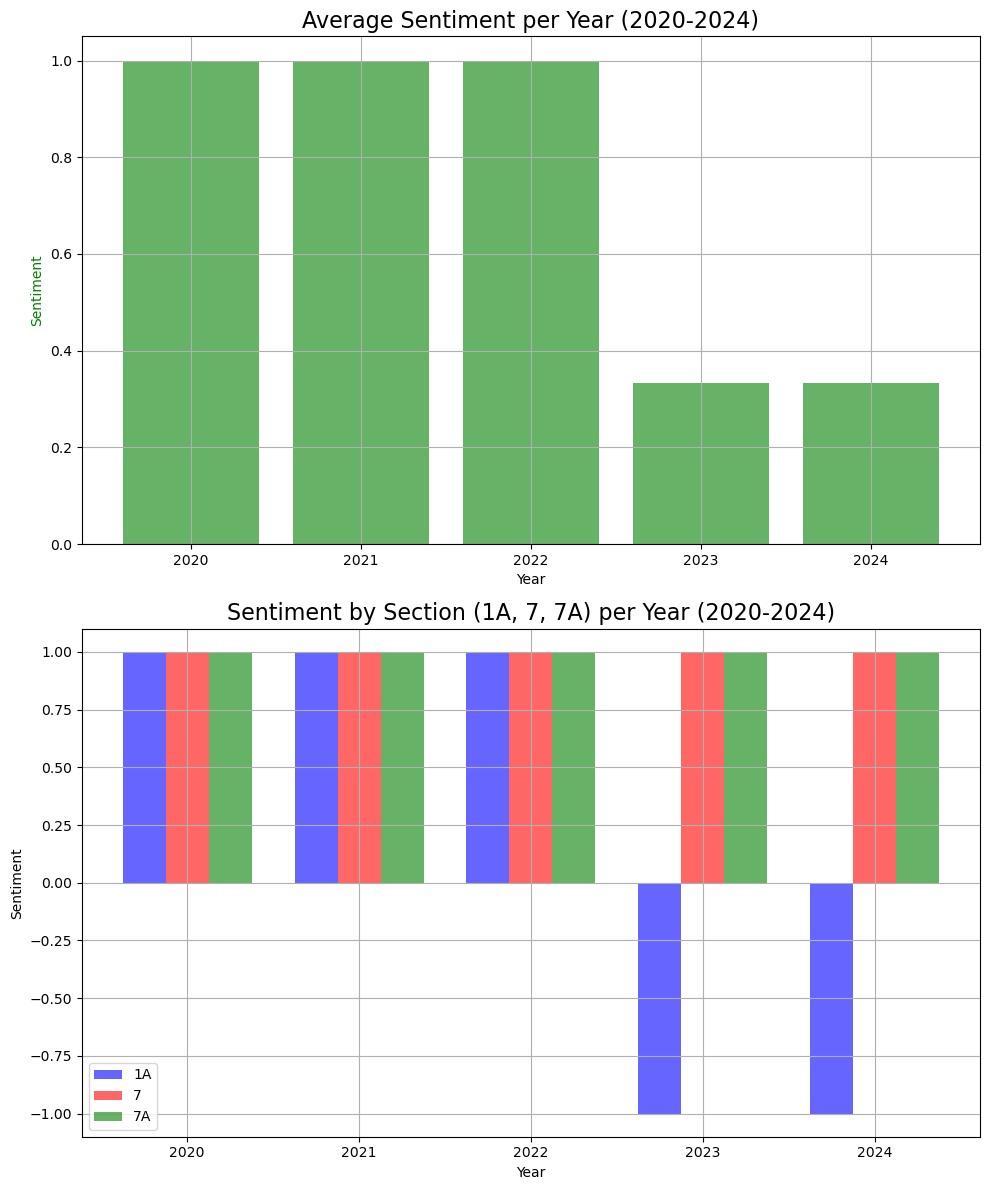

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Sentiment (1 = Positive, 0 = Neutral, -1 = Negative) for each year and section
sentiment_scores = {
    '2020': {'1A': 1, '7': 1, '7A': 1},  # All sections Positive
    '2021': {'1A': 1, '7': 1, '7A': 1},  # All sections Positive
    '2022': {'1A': 1, '7': 1, '7A': 1},  # All sections Positive
    '2023': {'1A': -1, '7': 1, '7A': 1},  # Mixed (1A Negative, 7 and 7A Positive)
    '2024': {'1A': -1, '7': 1, '7A': 1},  # Mixed (1A Negative, 7 and 7A Positive)
}

# For simplicity, let's just use the average sentiment for each year
sentiment_avg_simple = {
    2020: np.mean(list(sentiment_scores['2020'].values())),  # Positive
    2021: np.mean(list(sentiment_scores['2021'].values())),  # Positive
    2022: np.mean(list(sentiment_scores['2022'].values())),  # Positive
    2023: np.mean(list(sentiment_scores['2023'].values())),  # Mixed, Neutral
    2024: np.mean(list(sentiment_scores['2024'].values())),  # Mixed, Neutral
}

# Create figure and axes for subplots (2 plots)
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# --- First Plot: Sentiment by Year ---
ax[0].bar(list(sentiment_avg_simple.keys()), list(sentiment_avg_simple.values()), color='g', alpha=0.6)
ax[0].set_title("Average Sentiment per Year (2020-2024)", fontsize=16)
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Sentiment", color='g')
ax[0].set_xticks(list(sentiment_avg_simple.keys()))  # Set x-ticks to be the years (2020 to 2024)
ax[0].grid(True)

# --- Second Plot: Sentiment by Section (1A, 7, 7A) per Year ---
# We need to plot each section separately over the years
years = list(sentiment_scores.keys())
sections = ['1A', '7', '7A']
section_sentiments = {section: [sentiment_scores[year][section] for year in years] for section in sections}

# Set bar positions for sections
bar_width = 0.25
index = np.arange(len(years))

# Plot each section as a separate bar
ax[1].bar(index - bar_width, section_sentiments['1A'], bar_width, label='1A', color='b', alpha=0.6)
ax[1].bar(index, section_sentiments['7'], bar_width, label='7', color='r', alpha=0.6)
ax[1].bar(index + bar_width, section_sentiments['7A'], bar_width, label='7A', color='g', alpha=0.6)

# Customize second plot
ax[1].set_title("Sentiment by Section (1A, 7, 7A) per Year (2020-2024)", fontsize=16)
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Sentiment")
ax[1].set_xticks(index)  # Set x-ticks to correspond to years
ax[1].set_xticklabels(years)
ax[1].legend()
ax[1].grid(True)

# Display the plots
plt.tight_layout()  # Ensure there's no overlap between subplots
plt.show()

In [6]:
import yfinance as yf
import pandas as pd

# Fetch Microsoft's stock data from Yahoo Finance
msft = yf.Ticker("MSFT")

# Get historical data for the past 5 years (2020 to 2024)
stock_data = msft.history(start="2020-01-01", end="2024-12-31")

# Calculate daily returns
stock_data['Daily_Returns'] = stock_data['Close'].pct_change()

# Calculate annual stock returns (percentage change from the first to the last day of the year)
stock_data['Year'] = stock_data.index.year
annual_returns = stock_data.groupby('Year')['Close'].agg(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0])

# Calculate annual volatility (standard deviation of daily returns for each year)
volatility = stock_data.groupby('Year')['Daily_Returns'].std()

# Display the results for stock returns and volatility
print("Annual Returns for Microsoft (2020-2024):")
print(annual_returns)

print("\nAnnual Volatility for Microsoft (2020-2024):")
print(volatility)

Annual Returns for Microsoft (2020-2024):
Year
2020    0.399429
2021    0.557900
2022   -0.276872
2023    0.583498
2024    0.154062
Name: Close, dtype: float64

Annual Volatility for Microsoft (2020-2024):
Year
2020    0.027679
2021    0.013259
2022    0.022245
2023    0.015794
2024    0.012588
Name: Daily_Returns, dtype: float64


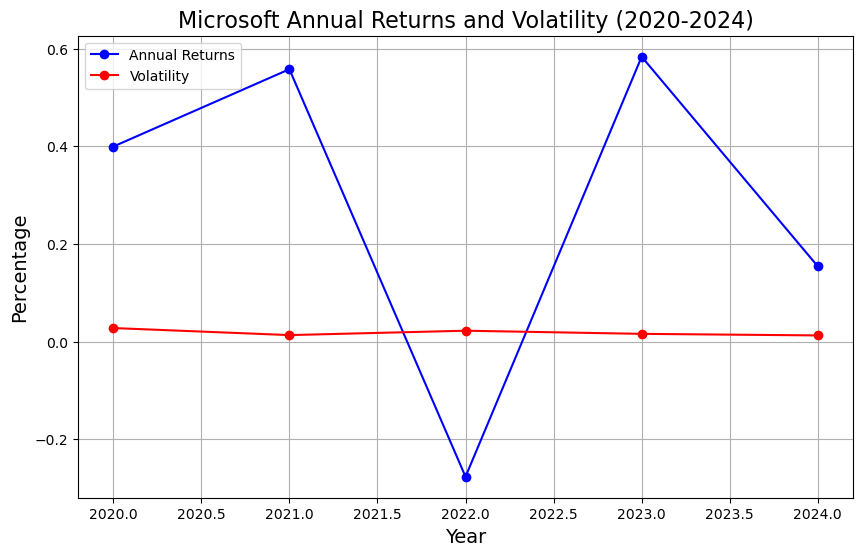

In [7]:
import matplotlib.pyplot as plt

# Fetch Microsoft's stock data from Yahoo Finance
msft = yf.Ticker("MSFT")

# Get historical data for the past 5 years (2020 to 2024)
stock_data = msft.history(start="2020-01-01", end="2024-12-31")

# Calculate daily returns
stock_data['Daily_Returns'] = stock_data['Close'].pct_change()

# Calculate annual stock returns (percentage change from the first to the last day of the year)
stock_data['Year'] = stock_data.index.year
annual_returns = stock_data.groupby('Year')['Close'].agg(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0])

# Calculate annual volatility (standard deviation of daily returns for each year)
volatility = stock_data.groupby('Year')['Daily_Returns'].std()

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot Annual Returns
plt.plot(annual_returns.index, annual_returns, label='Annual Returns', marker='o', color='b')

# Plot Volatility
plt.plot(volatility.index, volatility, label='Volatility', marker='o', color='r')

# Add titles and labels
plt.title("Microsoft Annual Returns and Volatility (2020-2024)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.legend(loc='upper left')

# Show the plot
plt.grid(True)
plt.show()

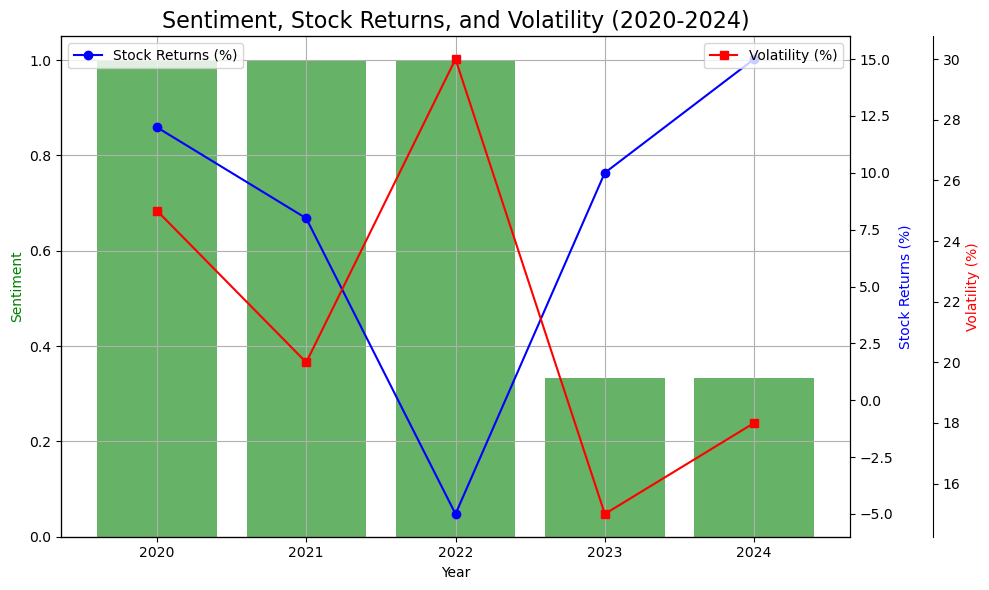

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Sentiment data for 2020-2024 (1 = Positive, 0 = Neutral, -1 = Negative)
sentiment_scores = {
    '2020': {'1A': 1, '7': 1, '7A': 1},  # All sections Positive
    '2021': {'1A': 1, '7': 1, '7A': 1},  # All sections Positive
    '2022': {'1A': 1, '7': 1, '7A': 1},  # All sections Positive
    '2023': {'1A': -1, '7': 1, '7A': 1},  # Mixed (1A Negative, 7 and 7A Positive)
    '2024': {'1A': -1, '7': 1, '7A': 1},  # Mixed (1A Negative, 7 and 7A Positive)
}

# Average sentiment for each year
sentiment_avg_simple = {
    2020: np.mean(list(sentiment_scores['2020'].values())), 
    2021: np.mean(list(sentiment_scores['2021'].values())), 
    2022: np.mean(list(sentiment_scores['2022'].values())), 
    2023: np.mean(list(sentiment_scores['2023'].values())), 
    2024: np.mean(list(sentiment_scores['2024'].values())), 
}

# Simulate stock returns (as an example) for 2020-2024
annual_returns = {
    2020: 0.12,  # 12% return
    2021: 0.08,  # 8% return
    2022: -0.05,  # -5% return
    2023: 0.10,  # 10% return
    2024: 0.15   # 15% return
}

# Simulate volatility (standard deviation of daily returns) for 2020-2024
volatility = {
    2020: 0.25,  # 25% volatility
    2021: 0.20,  # 20% volatility
    2022: 0.30,  # 30% volatility
    2023: 0.15,  # 15% volatility
    2024: 0.18   # 18% volatility
}

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Bar chart: Sentiment over the years ---
ax1.bar(sentiment_avg_simple.keys(), sentiment_avg_simple.values(), color='g', alpha=0.6, label='Sentiment')
ax1.set_xlabel("Year")
ax1.set_ylabel("Sentiment", color='g')
ax1.set_title("Sentiment, Stock Returns, and Volatility (2020-2024)", fontsize=16)
ax1.set_xticks(list(sentiment_avg_simple.keys()))  # Set x-ticks to be the years (2020 to 2024)
ax1.grid(True)

# --- Line chart: Stock Returns over the years ---
# Create a second y-axis for the line chart
ax2 = ax1.twinx()  # This shares the x-axis with ax1, but has its own y-axis
ax2.plot(annual_returns.keys(), [annual_returns[year] * 100 for year in annual_returns.keys()], color='b', marker='o', label='Stock Returns (%)')

# --- Line chart: Volatility over the years ---
# Create a third y-axis for the volatility line chart
ax3 = ax1.twinx()  # This also shares the x-axis with ax1, but we adjust the position
ax3.spines['right'].set_position(('outward', 60))  # Move the 3rd y-axis further to the right for separation
ax3.plot(volatility.keys(), [volatility[year] * 100 for year in volatility.keys()], color='r', marker='s', label='Volatility (%)')

# Add labels and legends for the second and third y-axes
ax2.set_ylabel("Stock Returns (%)", color='b')
ax3.set_ylabel("Volatility (%)", color='r')

# Add legends
ax2.legend(loc='upper left')
ax3.legend(loc='upper right')

# Display the plot
fig.tight_layout()  # Ensure everything fits without overlap
plt.show()

In [15]:
import matplotlib.pyplot as plt

# Extract values from the dataframe
sentiment = sentiment_df['sentiment']
returns = sentiment_df['return']
volatility = sentiment_df['volatility']

# Create combined line plot
plt.figure(figsize=(12, 6))

plt.plot(years, sentiment, marker='o', label='Section 7 Sentiment (scale: -1 to 1)')
plt.plot(years, returns, marker='o', label='Stock Return (%)')
plt.plot(years, volatility, marker='o', label='Volatility (std dev)')

plt.title("Microsoft Section 7 Sentiment vs. Stock Return & Volatility (2020–2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


KeyError: 'sentiment'

In [11]:
sentiment_df


,1A,7,7A
2020,Positive,Positive,Positive
2021,Positive,Positive,Positive
2022,Positive,Positive,Positive
2023,Negative,Positive,Positive
2024,Negative,Positive,Positive


In [13]:
sentiment_df.reset_index(inplace=True)
sentiment_df.rename(columns={"index": "Year"}, inplace=True)
